<a href="https://colab.research.google.com/github/SBU-COSMOLIKE/CoCoAGoogleColabExamples/blob/main/Cocoa_Example_DESI_RESULTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive (optional, does not work with local runtime)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

## Install Miniforge

In [ ]:
%%bash
export CONDA_DIR="/content/conda"
mkdir "${CONDA_DIR:?}"
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
/bin/bash Miniforge3-$(uname)-$(uname -m).sh -f -b -p "${CONDA_DIR:?}"
/bin/bash
source $CONDA_DIR/etc/profile.d/conda.sh \
      && conda config --set auto_update_conda false \
      && conda config --set show_channel_urls true \
      && conda config --set auto_activate_base false \
      && conda config --prepend channels conda-forge \
      && conda config --add allowlist_channels conda-forge \
      && conda config --set channel_priority strict \
      && conda init bash
source ~/.bashrc

PREFIX=/content/conda
Unpacking bootstrapper...
Unpacking payload...
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2025.11.12-hbd8a1cb_0.conda
Extracting libgomp-15.2.0-he0feb66_15.conda
Extracting nlohmann_json-abi-3.12.0-h0f90c79_1.conda
Extracting pybind11-abi-11-hc364b38_1.conda
Extracting python_abi-3.12-8_cp312.conda
Extracting tzdata-2025b-h78e105d_0.conda
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-15.2.0-he0feb66_15.conda
Extracting bzip2-1.0.8-hda65f42_8.conda
Extracting c-ares-1.34.5-hb9d3cd8_0.conda
Extracting keyutils-1.6.3-hb9d3cd8_0.conda
Extracting libexpat-2.7.3-hecca717_0.conda
Extracting libffi-3.5.2-h9ec8514_0.conda
Extracting libgcc-ng-15.2.0-h69a702a_15.conda
Extracting libiconv-1.18-h3b78370_2.conda
Extracting liblzma-5.8.1-hb9d3cd8_2.conda
Extracting libnsl-2.0.1-hb9d3cd8_1.conda
Extracting libstdcxx-15.2.0-h934c35e_15.conda
Extracting libuuid-2.41.2-h5347b49_1.conda
Extracting libzlib-1.3.1-hb9d3cd8_2.conda
Extract

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 81.7M  100 81.7M    0     0  77.8M      0  0:00:01  0:00:01 --:--:-- 77.8M
WARNING conda.cli.main_config:_set_key(456): Key auto_activate_base is an alias of auto_activate; setting value with latter


## Install Cocoa conda Environment


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda create -n lockenv -c conda-forge python=3.10 conda-lock=2.* wget --quiet --yes # Google Collab: additional arguments --quite --yes
wget https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate lockenv
conda-lock install -n cocoa cocoapy310-linux.yml

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Collab require conda to be loaded at every cell
conda activate cocoa                                  # Google Collab require conda to be loaded at every cell
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gcc "${CONDA_PREFIX}"/bin/gcc
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-g++ "${CONDA_PREFIX}"/bin/g++
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gfortran "${CONDA_PREFIX}"/bin/gfortran
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ar "${CONDA_PREFIX}"/bin/gcc-ar
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ranlib "${CONDA_PREFIX}"/bin/gcc-ranlib
git-lfs install

## Clone, setup and compile Cocoa (.local) env

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate cocoa                                  # Google Colab require conda to be loaded at every cell
git clone https://github.com/CosmoLike/cocoa.git --branch v5.0beta2 cocoa

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source setup_cocoa.sh

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source compile_cocoa.sh

##Saving CoCoA on drive (optional, does not work with local runtime)


In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa_5beta2.tar.gz"

mkdir -p "$DEST"

if [[ -f "$ARCHIVE" ]]; then
  echo "Backup already exists: $ARCHIVE — skipping."
  exit 0
fi

tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

echo "Created: $ARCHIVE"

# Alternative Installation: Load CoCoA from Drive (does not work with local runtime)


In [2]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa_5beta2.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 440623193.108900345 s in the future


# Run MCMC

In [3]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
mpirun -n 4 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    cobaya-run ./projects/example/EXAMPLE_EMUL_MCMC3.yaml -r

[0 : output] Output to be read-from/written-into folder './projects/example/chains', with prefix 'EXAMPLE_EMUL_MCMC3'
[0 : planck_2018_highl_plik.ttteee_lite] `clik` module loaded successfully from /content/cocoa/Cocoa/.local/lib/python/site-packages/clik
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                            

/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from v

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
tar -czf "$DEST/colab_test_example_desi_CHK1_$(date +%F_%H-%M).tar.gz" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_test_example_desi_CHK1_$(date +%F_%H-%M).tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

# Plot Chain



In [8]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

python - <<'PY'
import getdist.plots as gplot
from getdist import MCSamples
from getdist import loadMCSamples
import os
import matplotlib
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'png'

parameter = [u'omegam', u'w', u'wa']
chaindir  = os.environ['ROOTDIR'] + "/projects/example/chains/"

analysissettings={'smooth_scale_1D':0.25,
                  'smooth_scale_2D':0.25,
                  'ignore_rows': u'0.3',
                  'range_confidence' : u'0.005',
                  'fine_bins_2D': 1024,
                  'fine_bins_1D': 256}

g=gplot.getSubplotPlotter(chain_dir=chaindir,analysis_settings=analysissettings,width_inch=4.5)
g.settings.axis_tick_x_rotation=65
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 13.0
g.settings.legend_fontsize = 13.5
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=15.5
g.legend_labels=False

param_3d = None
g.triangle_plot([chaindir + '/EXAMPLE_EMUL_MCMC3'],
parameter,
plot_3d_with_param=param_3d,line_args=[
{'lw': 1.2,'ls': 'solid', 'color':'lightcoral'},
{'lw': 1.2,'ls': '--', 'color':'black'},
{'lw': 1.6,'ls': '-.', 'color': 'maroon'},
{'lw': 1.6,'ls': 'solid', 'color': 'indigo'},
],
contour_colors=['lightcoral','black','maroon','indigo'],
contour_ls=['solid','--','-.','solid'],
contour_lws=[1.0,1.5,1.5,1.0],
filled=[True,False,False,True],
shaded=False,
legend_labels=[
'w0wa (Planck + DES-Y5 + BAO)',
],
legend_loc=(0.48, 0.80))
g.export(os.path.join(chaindir,"example_desi_chain.png"))
# From GPT: hard-close to avoid destructor noise in Colab
import gc
plt.close('all')
del g
gc.collect()
PY

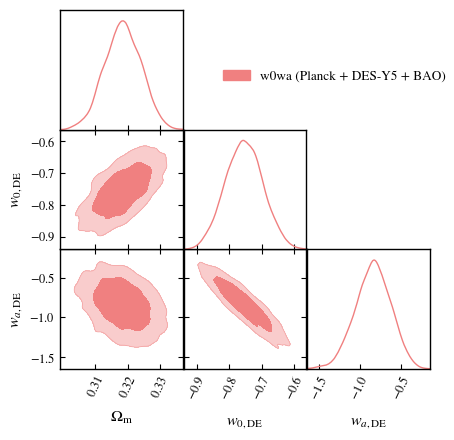

In [9]:
from IPython.display import Image, display
display(Image(filename="/content/cocoa/Cocoa/projects/example/chains/example_desi_chain.png"))
